### **Hi there! Welcome to my Yelp Review Classifier Project**

This project is all about building a machine learning model that can classify Yelp reviews as either **1-star (negative)** or **5-star (positive)**. It's like teaching a computer to understand customer feedback so businesses can know what people love (or not-so-love) about their service!

---

### **Here’s How I’m Tackling It:**
1. **Getting the Data Ready:**
   - First, I load a dataset of Yelp reviews and clean it up. This means making all the text lowercase, removing things like punctuation and unhelpful words ("the," "and"), and simplifying words to their basic forms (e.g., "running" becomes "run"). Think of this step as tidying up the text so it’s easier for the model to understand.

2. **Transforming Words into Numbers:**
   - Since computers don’t speak human, I use something called **TF-IDF (Term Frequency-Inverse Document Frequency)** to turn words into numbers. This helps the model focus on the most important words in each review—like "amazing" or "terrible"—instead of common ones like "food."

3. **Teaching the Model:**
   - Next, I use a **Multinomial Naive Bayes classifier** to teach the computer to spot patterns in the reviews and predict whether a review is glowing (5 stars) or ranting (1 star).

4. **Checking How It’s Doing:**
   - Once the model is trained, I test it to see how well it performs. I look at things like how often it’s right, where it makes mistakes, and how good it is at spotting negative reviews (super important for businesses to fix issues).

5. **Having Fun with Custom Reviews:**
   - Finally, I feed the model some made-up reviews to see how it predicts. It’s like a sneak peek of how it could work in real life.

---

### **What Tools Am I Using?**
- **Libraries:** Think of these as the toolbox:
  - `pandas` and `numpy` to organize and manage the data.
  - `seaborn` for pretty visuals to see trends in the data.
  - `nltk` to handle all the text cleaning and processing.
  - `scikit-learn` for the machine learning, including TF-IDF and the classifier.

- **Techniques:**
  - Cleaning and simplifying text so the model isn’t confused by random clutter.
  - Turning words into numbers so the computer can "read."
  - Teaching the model using data patterns to predict review ratings.

---

### **Significance**
This project shows how machine learning can take messy human language and turn it into useful insights. Imagine a business being able to instantly know what their customers love—or where they’re falling short—just by analyzing reviews. It’s all about using technology to improve experiences and make smarter decisions.

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import string
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Set plot style
sns.set_style("whitegrid")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
# Load the dataset
yelp_df = pd.read_csv("yelp.csv")

# Display dataset overview
print("\nDataset Overview:")
print(yelp_df.info())
yelp_df.head()



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


We visualize data to quickly understand its patterns, spot issues, and make better decisions.

For example, seeing how many 1-star and 5-star reviews we have helps us notice if the dataset is unbalanced, which can make the model unfair. Visualizing review lengths shows whether short or long reviews might impact predictions. It also helps us check if our data cleaning worked, like removing unnecessary words or punctuation.

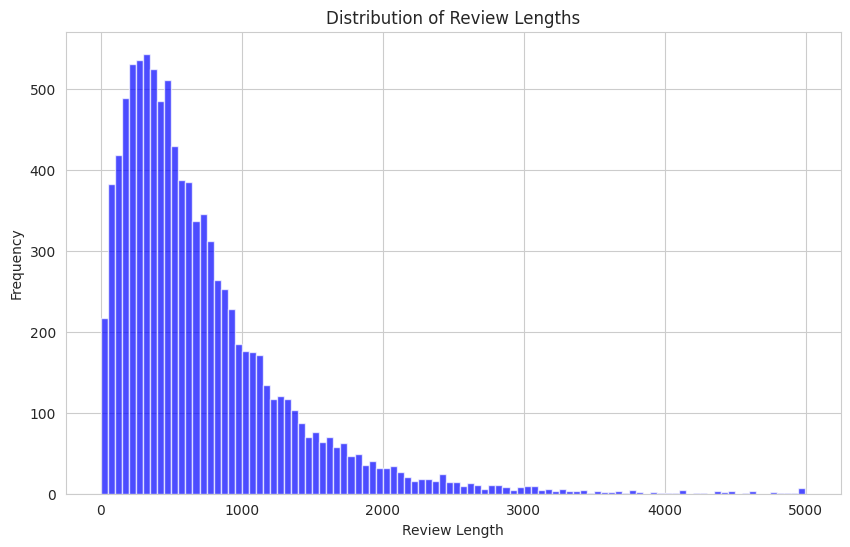

<ipython-input-6-192a671adff4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=yelp_df['stars'], palette="viridis")


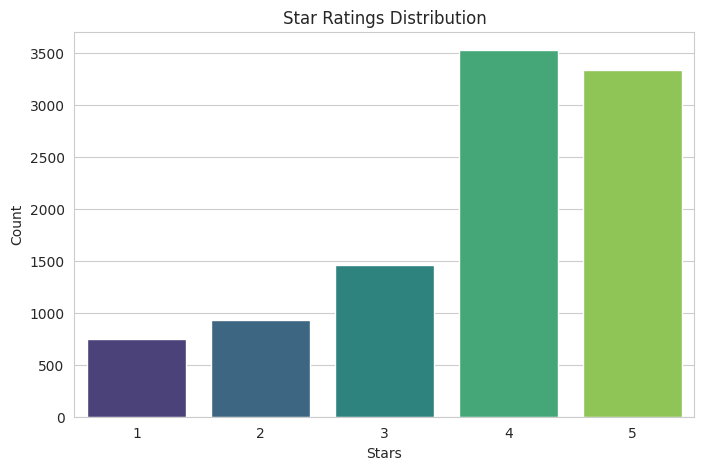

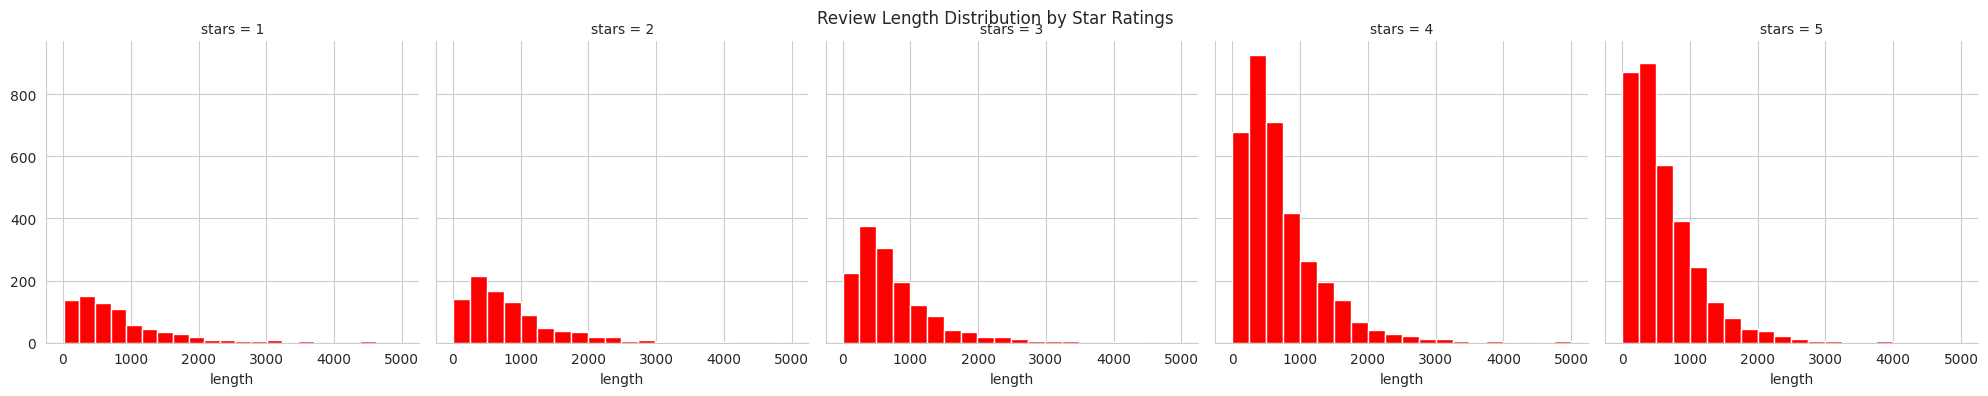

In [6]:
# Add a column for review lengths
yelp_df['length'] = yelp_df['text'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
yelp_df['length'].plot(bins=100, kind='hist', color='blue', alpha=0.7)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Visualize the distribution of star ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=yelp_df['stars'], palette="viridis")
plt.title("Star Ratings Distribution")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

# Visualize review lengths by star ratings
g = sns.FacetGrid(yelp_df, col='stars', col_wrap=5, height=4)
g.map(plt.hist, 'length', bins=20, color='r')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Review Length Distribution by Star Ratings")
plt.show()


To simplify lets look at 1 star and 5 star reviews

Filtering dataset for 1-star and 5-star reviews...


<ipython-input-7-19054f01f238>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=yelp_df_1_5['stars'], palette="coolwarm")


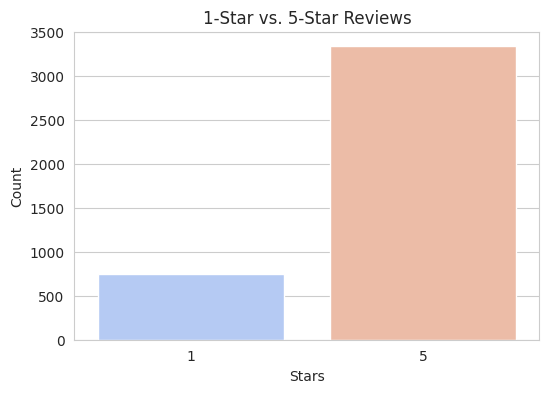

1-Star Reviews: 749 (18.33%)
5-Star Reviews: 3337 (81.67%)


In [7]:
# Filter dataset for 1-star and 5-star reviews
print("Filtering dataset for 1-star and 5-star reviews...")
yelp_df_1 = yelp_df[yelp_df['stars'] == 1]
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=yelp_df_1_5['stars'], palette="coolwarm")
plt.title("1-Star vs. 5-Star Reviews")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

print(f"1-Star Reviews: {len(yelp_df_1)} ({(len(yelp_df_1) / len(yelp_df_1_5)) * 100:.2f}%)")
print(f"5-Star Reviews: {len(yelp_df_5)} ({(len(yelp_df_5) / len(yelp_df_1_5)) * 100:.2f}%)")


**Note the imbalanced data**

In [8]:
# Text preprocessing function
def preprocess_text(text):
    """
    Preprocesses text by:
    1. Converting to lowercase: Machine learning treats "Food" and "food" as different words. Converting everything to lowercase ensures consistency and prevents duplication of meaning.
    2. Tokenizing text: helps the model focus on the meaning of each word instead of treating the whole sentence as one blob.
    3. Removing punctuation: Punctuation usually doesn't add meaning to the text for classification
    4. Removing stopwords: Removes common words like "the," "and," "is," which don't carry much meaning.
    5. Lemmatizing words: Converts words to their base form
    """
    # Initialize tools
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords, then lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens if word not in string.punctuation and word not in stop_words
    ]

    return " ".join(cleaned_tokens)


In [11]:
# Apply preprocessing to the text column
print("Preprocessing text data...")
yelp_df_1_5['cleaned_text'] = yelp_df_1_5['text'].apply(preprocess_text)
yelp_df_1_5[['text', 'cleaned_text']].head()


Preprocessing text data...


,text,cleaned_text
23,U can go there n check the car out. If u wanna...,u go n check car u wan na buy 1 's wrong move ...
31,Disgusting! Had a Groupon so my daughter and ...,disgusting groupon daughter tried outdated gau...
35,"I've eaten here many times, but none as bad as...",'ve eaten many time none bad last night servic...
61,I have always been a fan of Burlington's deals...,always fan burlington 's deal however shopping...
64,Another night meeting friends here. I have to...,another night meeting friend laugh waited anot...


This step converts the cleaned text into a numerical format that a machine learning model can understand using a **TF-IDF Vectorizer**. TF-IDF assigns a weight to each word based on its importance in a review and across all reviews. Words that appear frequently in a specific review (like "amazing") but less commonly across all reviews get higher importance, while common words like "the" or "food" are downweighted. The `fit_transform()` method processes the dataset to create a **feature matrix (`X`)**, where each row represents a review, each column represents a unique word (limited to the top 5000 most important words for efficiency), and each cell contains the word's TF-IDF score. The star ratings (`y`) are stored separately as the target labels. This step is crucial because machine learning models require numerical input, and TF-IDF effectively captures the importance of words.

In [12]:
# Convert text to numerical data using TF-IDF
print("Vectorizing text data...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(yelp_df_1_5['cleaned_text'])
y = yelp_df_1_5['stars'].values

print(f"Feature matrix shape: {X.shape}")


Vectorizing text data...
Feature matrix shape: (4086, 5000)


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train a Multinomial Naive Bayes classifier
print("Training the model...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


Training the model...


MultinomialNB()

Evaluating the model...


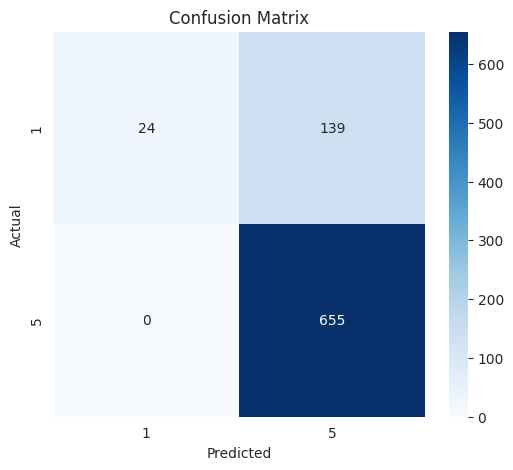

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.15      0.26       163
           5       0.82      1.00      0.90       655

    accuracy                           0.83       818
   macro avg       0.91      0.57      0.58       818
weighted avg       0.86      0.83      0.78       818



In [15]:
# Evaluate the model
print("Evaluating the model...")
y_pred = nb_classifier.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[1, 5], yticklabels=[1, 5])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


For 1-Star Reviews (Negative):

Precision (1.00):
When the model predicts a review is 1-star, it's correct every time (perfect precision).
Recall (0.15):
But the model only finds 15% of all the actual 1-star reviews.
F1-Score (0.26):
The overall performance for 1-star reviews is poor because it misses most of them.

For 5-Star Reviews (Positive):

Precision (0.82):
When the model predicts a review is 5-star, it's correct 82% of the time.
Recall (1.00):
It finds all the actual 5-star reviews in the data.
F1-Score (0.90):
The model is doing a great job with 5-star reviews overall.
Overall Accuracy (83%):

The model gets 83% of all reviews right.
But this high accuracy is misleading because the model heavily favors 5-star reviews, which are the majority.

In [16]:
# Test the model with custom reviews
print("Testing the model with sample inputs...")
sample_reviews = [
    "The food was amazing and the service was excellent!",
    "Terrible experience. The food was cold, and the staff was rude.",
    "I love the ambiance but the food was not great.",
    "Overpriced and horrible service. Never coming back!"
]
sample_vectors = tfidf_vectorizer.transform(sample_reviews)
sample_predictions = nb_classifier.predict(sample_vectors)

for review, stars in zip(sample_reviews, sample_predictions):
    print(f"Review: {review}\nPredicted Stars: {stars}\n")


Testing the model with sample inputs...
Review: The food was amazing and the service was excellent!
Predicted Stars: 5

Review: Terrible experience. The food was cold, and the staff was rude.
Predicted Stars: 5

Review: I love the ambiance but the food was not great.
Predicted Stars: 5

Review: Overpriced and horrible service. Never coming back!
Predicted Stars: 1



How I would improve the model in the future:

- **Balance the data:** Add more 1-star reviews (oversampling) or reduce the number of 5-star reviews (undersampling) to avoid bias in predictions.

- **Try different algorithms:** Experiment with Logistic Regression, Support Vector Machines (SVM), or advanced methods like Random Forest or Gradient Boosting for better results.

- **Add meaningful features:** Include features like review length or sentiment analysis (e.g., positive or negative tone) to give the model more context.

- **Optimize word representation:** Adjust how words are processed using TF-IDF parameters (e.g., include bigrams like "not good") or try advanced techniques like Word2Vec or BERT.

- **Use cross-validation:** Test the model on different data splits to ensure it performs well on unseen reviews.

- **Analyze errors:** Review misclassified reviews to identify patterns and improve the model’s understanding.